<a href="https://colab.research.google.com/github/sijo122aj7/sijo/blob/main/sijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load dataset (e.g., Ames Housing)
df = pd.read_csv('train.csv')  # Replace with actual dataset path

# Basic cleaning
df.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = df['SalePrice']
X = df.select_dtypes(include=[np.number]).drop(['SalePrice'], axis=1).fillna(0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2

results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
results['Linear Regression'] = evaluate_model(lr, X_test, y_test)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
results['Ridge Regression'] = evaluate_model(ridge, X_test, y_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
results['Lasso Regression'] = evaluate_model(lasso, X_test, y_test)

# Decision Tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
results['Decision Tree'] = evaluate_model(tree, X_test, y_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
results['Random Forest'] = evaluate_model(rf, X_test, y_test)

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
results['XGBoost'] = evaluate_model(xgb, X_test, y_test)


In [6]:
results_df = pd.DataFrame(results, index=['RMSE', 'R2 Score']).T
print(results_df.sort_values(by='R2 Score', ascending=False))


                           RMSE  R2 Score
XGBoost            27995.425912  0.897821
Random Forest      29931.828958  0.883197
Linear Regression  36102.101578  0.830077
Lasso Regression   36102.106045  0.830077
Ridge Regression   36102.892466  0.830070
Decision Tree      39630.616161  0.795239


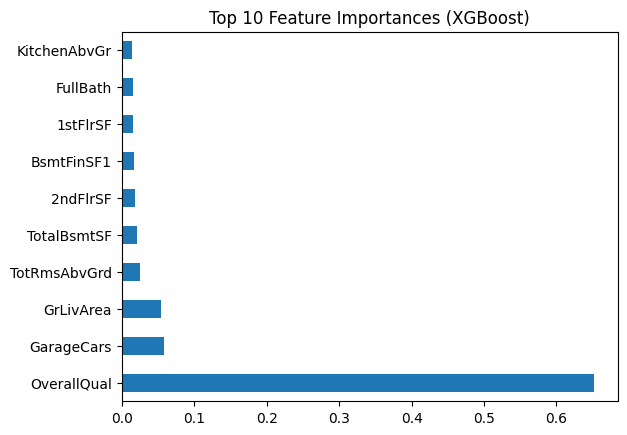

In [7]:
# Feature importance from XGBoost
xgb_feat_importance = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()
